In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('./data/bmi_500.csv')

In [3]:
data

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight
...,...,...,...,...
495,Female,150,153,Extreme Obesity
496,Female,184,121,Obesity
497,Female,141,136,Extreme Obesity
498,Male,150,95,Extreme Obesity


### 목표
- 성별, 키, 몸무게 데이터를 이용하여 비만도 등급을 분류해보자


In [4]:
data['Label'].value_counts()

Extreme Obesity    198
Obesity            130
Normal              69
Overweight          68
Weak                22
Extremely Weak      13
Name: Label, dtype: int64

- Extreme Obesity : 극도비만
- Obesity : 비만
- Normal : 정상
- Overweight : 살짝 비만
- Weak : 살짝 마름
- Extremely Weak : 저체중

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Label   500 non-null    object
dtypes: int64(2), object(2)
memory usage: 15.8+ KB


#### 각 비만도 등급별 시각화

In [6]:
tbl = pd.read_csv('./data/bmi_500.csv', index_col = 'Label')
tbl

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61
...,...,...,...
Extreme Obesity,Female,150,153
Obesity,Female,184,121
Extreme Obesity,Female,141,136


In [7]:
tbl.loc['Normal']

,Gender,Height,Weight
Label,,,
Normal,Male,189,87
Normal,Male,195,81
Normal,Male,155,51
Normal,Male,191,79
Normal,Female,172,67
...,...,...,...
Normal,Female,178,65
Normal,Male,167,64
Normal,Female,151,55


In [8]:
import matplotlib.pyplot as plt

In [29]:
def myScatter(label, color):
    tmp = tbl.loc[label]
    plt.scatter(tmp['Weight'], tmp['Height'], c= color, label = label)

Extreme Obesity    198
Obesity            130
Normal              69
Overweight          68
Weak                22
Extremely Weak      13

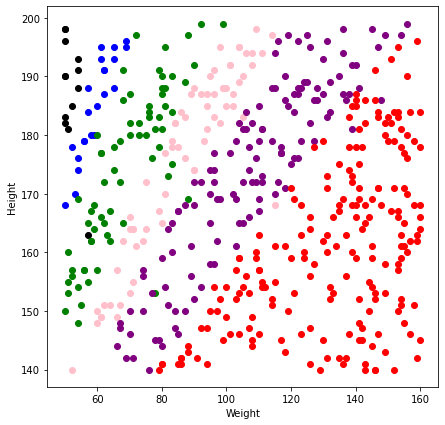

In [31]:
plt.figure(figsize = (7,7))
myScatter('Extremely Weak', 'black')
myScatter('Weak', 'blue')
myScatter('Overweight','pink')
myScatter('Normal', 'green')
myScatter('Obesity','purple')
myScatter('Extreme Obesity', 'red')

plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [11]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

####  라벨인코딩

In [12]:
dic = {
    'Male':0,
    'Female':1
}

In [13]:
X['Gender'] = X['Gender'].map(dic)

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Gender  500 non-null    int64
 1   Height  500 non-null    int64
 2   Weight  500 non-null    int64
dtypes: int64(3)
memory usage: 11.8 KB


#### 원핫인코딩

In [15]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [16]:
X

,Gender,Height,Weight
0,Male,174,96
1,Male,189,87
2,Female,185,110
3,Female,195,104
4,Male,149,61
...,...,...,...
495,Female,150,153
496,Female,184,121
497,Female,141,136
498,Male,150,95


In [17]:
dummy = pd.get_dummies(X['Gender'], prefix = 'Gender')

In [18]:
X = pd.concat([X, dummy], axis = 1)

In [19]:
X.drop('Gender', axis = 1, inplace = True)

In [20]:
X

,Height,Weight,Gender_Female,Gender_Male
0,174,96,0,1
1,189,87,0,1
2,185,110,1,0
3,195,104,1,0
4,149,61,0,1
...,...,...,...,...
495,150,153,1,0
496,184,121,1,0
497,141,136,1,0
498,150,95,0,1


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

#### 모델링

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [24]:
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier()

In [25]:
knn.fit(X_train, y_train)
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
knn.score(X_test, y_test)

0.92

In [27]:
tree.score(X_test, y_test)

0.8733333333333333

In [28]:
knn.predict([[179,70,0,1]])

array(['Normal'], dtype=object)